## Data loading
Load the Amazon sales dataset.


In [24]:
import pandas as pd

try:
    df = pd.read_excel('amazon_sales_dataset_2019_2024_corrected.xlsx')
    display(df.head())
except FileNotFoundError:
    print("Error: 'amazon_sales_dataset_2019_2024_corrected.xlsx' not found.")
    df = None  # Set df to None to indicate an error
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Order ID,Order Date,Customer ID,Customer Name,Region,Product Category,Product Name,Quantity Sold,Unit Price,Discount (%),Salesperson,Payment Method,Order Status,Total Sales,Profit Margin
0,576ca8db-ad1a-4aa8-9c3a-89102555f200,2019-01-01,48aa940a-5cb5-4103-8d89-19c10fd26aaf,Stephanie Garcia,South America,Home & Kitchen,Speak,9,484.46,21.33,Johnny Marshall,Debit Card,Returned,3430.12,1193.53
1,b7154d7e-f369-4a81-80b1-d36b23cc0420,2019-01-01,8de3545c-78e6-4962-ace5-02e37fe1ce91,Jacob Morales,South America,Books,If,10,179.28,6.43,Bradley Howe,Gift Card,Pending,1677.52,583.70
2,b2852522-fbaa-43fa-b165-bd10e0035591,2019-01-02,6ac41f61-acf6-4e46-8b70-ad00ce01c9d0,John Carroll,North America,Sports,Big,6,185.34,1.57,Johnny Marshall,Amazon Pay,Completed,1094.58,380.86
3,f14eae78-235f-4283-a2cc-6433fd861c14,2019-01-04,04bb6a6a-a62a-4e79-a038-68758f215ccc,Allison Ramirez,Asia,Home & Kitchen,Serious,5,40.98,4.21,Roger Brown,PayPal,Completed,196.27,68.29
4,c3fcb6f0-a399-47eb-8903-2a354425ea75,2019-01-04,2267ce03-37ba-446a-b279-17ecee550c6e,James Thompson,North America,Toys,Operation,10,459.39,20.50,Kristen Ramos,PayPal,Cancelled,3652.15,1270.78


In [25]:
df.shape

(5000, 15)

In [26]:
df.columns

Index(['Order ID', 'Order Date', 'Customer ID', 'Customer Name', 'Region',
       'Product Category', 'Product Name', 'Quantity Sold', 'Unit Price',
       'Discount (%)', 'Salesperson', 'Payment Method', 'Order Status',
       'Total Sales', 'Profit Margin'],
      dtype='object')

In [27]:
print(repr(df.columns))

Index(['Order ID', 'Order Date', 'Customer ID', 'Customer Name', 'Region',
       'Product Category', 'Product Name', 'Quantity Sold', 'Unit Price',
       'Discount (%)', 'Salesperson', 'Payment Method', 'Order Status',
       'Total Sales', 'Profit Margin'],
      dtype='object')


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          5000 non-null   object        
 1   Order Date        5000 non-null   datetime64[ns]
 2   Customer ID       5000 non-null   object        
 3   Customer Name     5000 non-null   object        
 4   Region            5000 non-null   object        
 5   Product Category  5000 non-null   object        
 6   Product Name      4999 non-null   object        
 7   Quantity Sold     5000 non-null   int64         
 8   Unit Price        5000 non-null   float64       
 9   Discount (%)      5000 non-null   float64       
 10  Salesperson       5000 non-null   object        
 11  Payment Method    5000 non-null   object        
 12  Order Status      5000 non-null   object        
 13  Total Sales       5000 non-null   float64       
 14  Profit Margin     5000 n

In [29]:
df.isnull().sum()

,0
Order ID,0
Order Date,0
Customer ID,0
Customer Name,0
Region,0
Product Category,0
Product Name,1
Quantity Sold,0
Unit Price,0
Discount (%),0


In [30]:
df.dropna(subset=['Product Name'], inplace=True)
df.isnull().sum()

,0
Order ID,0
Order Date,0
Customer ID,0
Customer Name,0
Region,0
Product Category,0
Product Name,0
Quantity Sold,0
Unit Price,0
Discount (%),0


## Data cleaning


Clean the loaded Amazon sales dataset.


In [32]:
import pandas as pd
import numpy as np

# Handle missing values
for col in ['Quantity Sold', 'Unit Price', 'Discount (%)', 'Total Sales', 'Profit Margin']:
    df[col] = df[col].fillna(df[col].median())

# Outlier detection and treatment (using IQR method)
numerical_features = ['Quantity Sold', 'Unit Price', 'Discount (%)', 'Total Sales', 'Profit Margin']

for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = np.clip(df[feature], lower_bound, upper_bound)

# Date format validation
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df.dropna(subset=['Order Date'], inplace=True)
print(df.dtypes)

# Remove duplicate rows
num_duplicates = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows removed: {num_duplicates}")

display(df.head())

Order ID                    object
Order Date          datetime64[ns]
Customer ID                 object
Customer Name               object
Region                      object
Product Category            object
Product Name                object
Quantity Sold                int64
Unit Price                 float64
Discount (%)               float64
Salesperson                 object
Payment Method              object
Order Status                object
Total Sales                float64
Profit Margin              float64
dtype: object
Number of duplicate rows removed: 0


,Order ID,Order Date,Customer ID,Customer Name,Region,Product Category,Product Name,Quantity Sold,Unit Price,Discount (%),Salesperson,Payment Method,Order Status,Total Sales,Profit Margin
0,576ca8db-ad1a-4aa8-9c3a-89102555f200,2019-01-01,48aa940a-5cb5-4103-8d89-19c10fd26aaf,Stephanie Garcia,South America,Home & Kitchen,Speak,9,484.46,21.33,Johnny Marshall,Debit Card,Returned,3430.12,1193.53
1,b7154d7e-f369-4a81-80b1-d36b23cc0420,2019-01-01,8de3545c-78e6-4962-ace5-02e37fe1ce91,Jacob Morales,South America,Books,If,10,179.28,6.43,Bradley Howe,Gift Card,Pending,1677.52,583.70
2,b2852522-fbaa-43fa-b165-bd10e0035591,2019-01-02,6ac41f61-acf6-4e46-8b70-ad00ce01c9d0,John Carroll,North America,Sports,Big,6,185.34,1.57,Johnny Marshall,Amazon Pay,Completed,1094.58,380.86
3,f14eae78-235f-4283-a2cc-6433fd861c14,2019-01-04,04bb6a6a-a62a-4e79-a038-68758f215ccc,Allison Ramirez,Asia,Home & Kitchen,Serious,5,40.98,4.21,Roger Brown,PayPal,Completed,196.27,68.29
4,c3fcb6f0-a399-47eb-8903-2a354425ea75,2019-01-04,2267ce03-37ba-446a-b279-17ecee550c6e,James Thompson,North America,Toys,Operation,10,459.39,20.50,Kristen Ramos,PayPal,Cancelled,3652.15,1270.78


## Data exploration


Explore the cleaned Amazon sales dataset and visualize the time series data.


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
#Descriptive statistics for Total Sales
sales_stats = df['Total Sales'].describe()
print("Descriptive Statistics for Total Sales:\n", sales_stats)

Descriptive Statistics for Total Sales:
 count    4999.000000
mean     1182.830412
std       975.915388
min         4.610000
25%       370.095000
50%       907.870000
75%      1763.025000
max      3852.420000
Name: Total Sales, dtype: float64


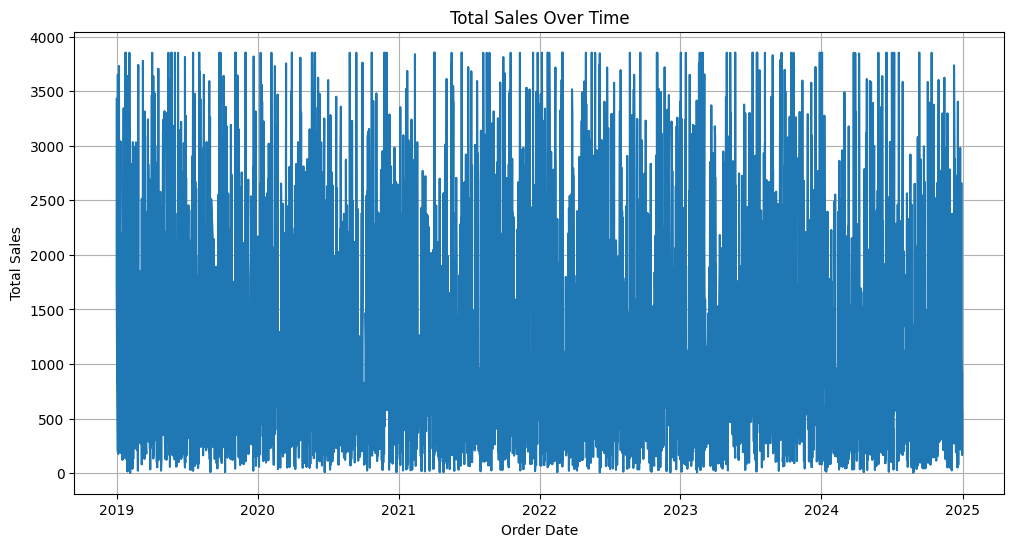

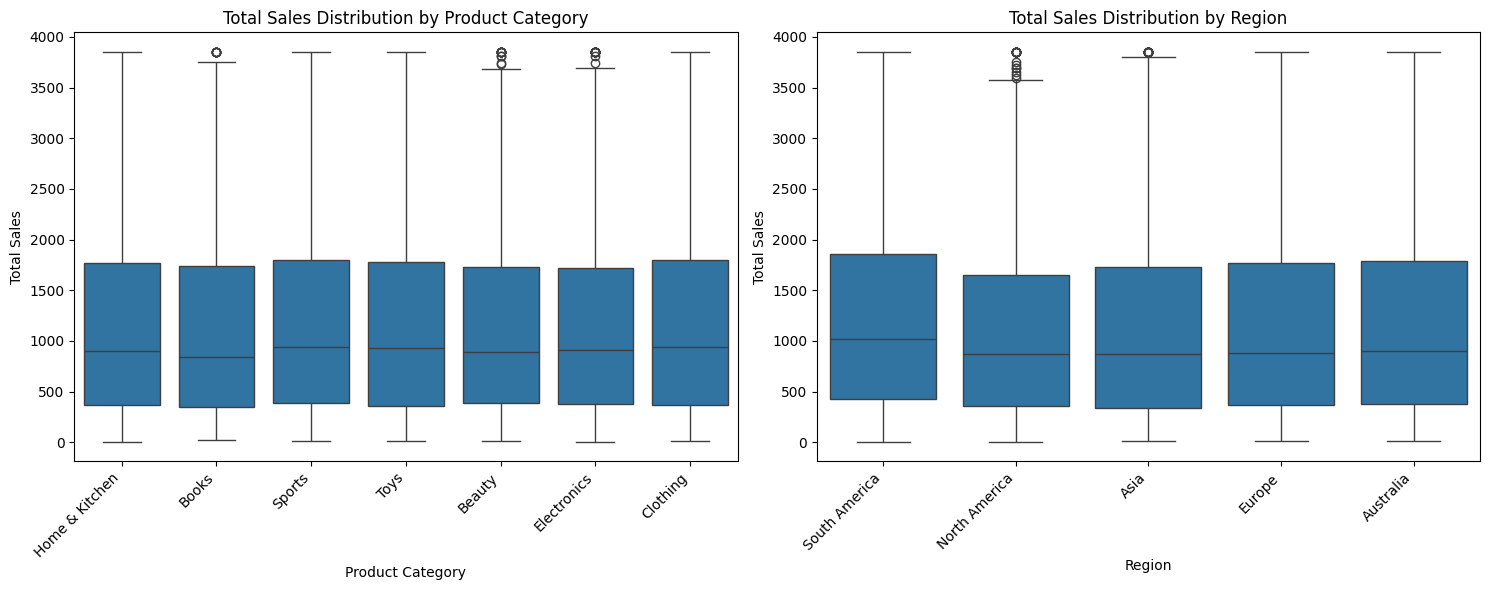

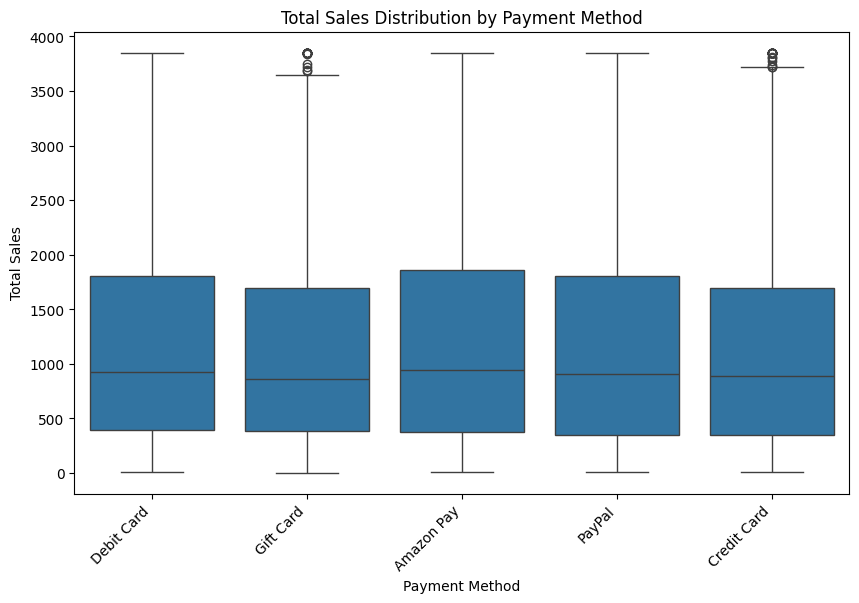

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize Total Sales over time
plt.figure(figsize=(12, 6))
plt.plot(df['Order Date'], df['Total Sales'])
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.grid(True)
plt.show()


# 2. Relationship between Total Sales and other columns
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Product Category', y='Total Sales', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Total Sales Distribution by Product Category')

plt.subplot(1, 2, 2)
sns.boxplot(x='Region', y='Total Sales', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Total Sales Distribution by Region')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Payment Method', y='Total Sales', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Total Sales Distribution by Payment Method')
plt.show()

In [35]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Convert 'Order Date' to datetime index if it's not already
if not isinstance(df.index, pd.DatetimeIndex):
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    df = df.set_index('Order Date')

# Augmented Dickey-Fuller test
result = adfuller(df['Total Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[1] <= 0.05:
    print("The time series is likely stationary.")
else:
    print("The time series is likely non-stationary.")



ADF Statistic: -48.784546
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
The time series is likely stationary.


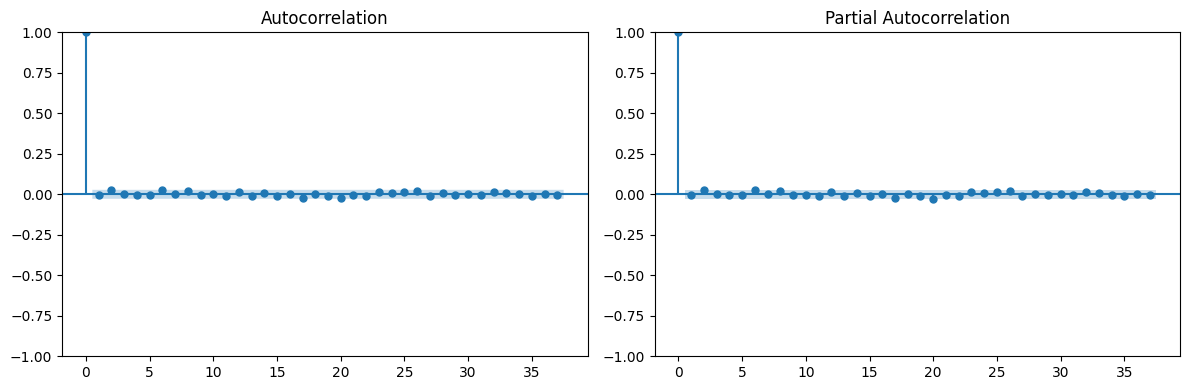

In [36]:
# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df['Total Sales'], ax=axes[0])
plot_pacf(df['Total Sales'], ax=axes[1])
plt.tight_layout()
plt.show()

## Data preparation


Prepare the data for time series modeling.


**Task**:
Resample the 'Total Sales' data to monthly frequency, check for stationarity using the Augmented Dickey-Fuller test, difference the data if necessary, and split the data into training and testing sets.



In [37]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split

# 1. Data Resampling
df_resampled = df.resample('M')['Total Sales'].sum()

# 2. Stationarity Check and Differencing
result = adfuller(df_resampled)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

df_stationary = df_resampled
if result[1] > 0.05:
    df_stationary = df_resampled.diff().dropna()
    result = adfuller(df_stationary)
    print(f'ADF Statistic after 1st differencing: {result[0]}')
    print(f'p-value after 1st differencing: {result[1]}')
    if result[1] > 0.05:
        df_stationary = df_stationary.diff().dropna()
        result = adfuller(df_stationary)
        print(f'ADF Statistic after 2nd differencing: {result[0]}')
        print(f'p-value after 2nd differencing: {result[1]}')

# 3. Data Splitting
train_size = int(len(df_stationary) * 0.8)
df_train = df_stationary[:train_size]
df_test = df_stationary[train_size:]
print(len(df_train), len(df_test))

ADF Statistic: -7.416237816990963
p-value: 6.923579602544072e-11
57 15


<ipython-input-37-639adc7e4fc4>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.resample('M')['Total Sales'].sum()


## Model training



Train ARIMA, SARIMA, and LSTM models on the prepared time series data.  

In [38]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.7 MB/s eta 0:00:00


In [39]:
import pmdarima as pm
from pmdarima import model_selection
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense , Input
from tensorflow.keras.models import Model
import numpy as np

# ARIMA
try:
    arima_model = pm.auto_arima(df_train, seasonal=False, suppress_warnings=True, error_action="ignore")
    arima_aic = arima_model.aic()
    arima_bic = arima_model.bic()
    print(f"ARIMA AIC: {arima_aic}, BIC: {arima_bic}")
except Exception as e:
    print(f"An error occurred during ARIMA model training: {e}")
    arima_model = None
    arima_aic = None
    arima_bic = None


# SARIMA
try:
    # Assuming seasonal order (1, 0, 1, 12) as example, adjust as needed.
    sarima_model = SARIMAX(df_train, order=(5, 0, 1), seasonal_order=(1, 0, 1, 12)).fit(disp=False)
    sarima_aic = sarima_model.aic
    sarima_bic = sarima_model.bic
    print(f"SARIMA AIC: {sarima_aic}, BIC: {sarima_bic}")
except Exception as e:
    print(f"An error occurred during SARIMA model training: {e}")
    sarima_model = None
    sarima_aic = None
    sarima_bic = None

# LSTM Modeling
try:
    # Scale data
    scaler = MinMaxScaler()
    df_train_scaled = scaler.fit_transform(np.array(df_train).reshape(-1, 1))

    # Reshape data for LSTM
    lookback = 12
    X_train, y_train = [], []
    for i in range(lookback, len(df_train_scaled)):
        X_train.append(df_train_scaled[i-lookback:i, 0])
        y_train.append(df_train_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")

    # Define LSTM model using functional API
    inputs = Input(shape=(lookback, 1))
    lstm_layer = LSTM(50, activation='relu')(inputs)
    output_layer = Dense(1)(lstm_layer)
    model = Model(inputs=inputs, outputs=output_layer)
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=0)

except Exception as e:
    print(f"An error occurred during LSTM model training: {e}")
    model = None

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

ARIMA AIC: 1243.7027745544779, BIC: 1247.788877090147


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA AIC: 1267.501282139169, BIC: 1285.88874354968
X_train shape: (45, 12, 1)
y_train shape: (45,)


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# ARIMA evaluation
arima_predictions = arima_model.predict(n_periods=len(df_test))
rmse_arima = np.sqrt(mean_squared_error(df_test, arima_predictions))
mae_arima = mean_absolute_error(df_test, arima_predictions)
mape_arima = mape(df_test, arima_predictions)

print(f"ARIMA - RMSE: {rmse_arima:.2f}, MAE: {mae_arima:.2f}, MAPE: {mape_arima:.2f}%")
print(f"ARIMA - AIC: {arima_model.aic()}, BIC: {arima_model.bic()}")

# SARIMA evaluation
try:
    sarima_predictions = sarima_model.predict(start=len(df_train), end=len(df_train) + len(df_test) - 1, dynamic=False, params=sarima_model.params)
    rmse_sarima = np.sqrt(mean_squared_error(df_test, sarima_predictions))
    mae_sarima = mean_absolute_error(df_test, sarima_predictions)
    mape_sarima = mape(df_test, sarima_predictions)
    print(f"SARIMA - RMSE: {rmse_sarima:.2f}, MAE: {mae_sarima:.2f}, MAPE: {mape_sarima:.2f}%")
    print(f"SARIMA - AIC: {sarima_model.aic}, BIC: {sarima_model.bic}")
except Exception as e:
    print(f"An error occurred during SARIMA prediction: {e}")

# LSTM Model
scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(np.array(df_train).reshape(-1, 1))

lookback = 12
X_train, y_train = [], []
for i in range(lookback, len(df_train_scaled)):
    X_train.append(df_train_scaled[i-lookback:i, 0])
    y_train.append(df_train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

inputs = Input(shape=(lookback, 1))
lstm_layer = LSTM(50, activation='relu')(inputs)
output_layer = Dense(1)(lstm_layer)
lstm_model = Model(inputs=inputs, outputs=output_layer)
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=0)

# LSTM Evaluation
try:
    df_test_scaled = scaler.transform(np.array(df_test).reshape(-1, 1))
    X_test, y_test = [], []
    for i in range(lookback, len(df_test_scaled)):
        X_test.append(df_test_scaled[i-lookback:i, 0])
        y_test.append(df_test_scaled[i, 0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    lstm_predictions_scaled = lstm_model.predict(X_test)
    lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
    y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    rmse_lstm = np.sqrt(mean_squared_error(y_test_unscaled, lstm_predictions))
    mae_lstm = mean_absolute_error(y_test_unscaled, lstm_predictions)
    mape_lstm = mape(y_test_unscaled, lstm_predictions)
    print(f"LSTM - RMSE: {rmse_lstm:.2f}, MAE: {mae_lstm:.2f}, MAPE: {mape_lstm:.2f}%")

except Exception as e:
    print(f"An error occurred during LSTM prediction: {e}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['params']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


ARIMA - RMSE: 13491.95, MAE: 10388.09, MAPE: 15.52%
ARIMA - AIC: 1243.7027745544779, BIC: 1247.788877090147
SARIMA - RMSE: 13891.51, MAE: 10541.87, MAPE: 15.82%
SARIMA - AIC: 1267.501282139169, BIC: 1285.88874354968
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
LSTM - RMSE: 11107.81, MAE: 8940.90, MAPE: 9.47%


## Model optimization



In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Optimized LSTM Model
try:
    # Check if dataframes are empty
    if df_train.empty or df_test.empty:
        print("Error: Training or testing dataset is empty.")
        raise ValueError("Empty dataframe")

    # Scale data
    scaler = MinMaxScaler()
    df_train_scaled = scaler.fit_transform(np.array(df_train).reshape(-1, 1))
    df_test_scaled = scaler.transform(np.array(df_test).reshape(-1, 1))

    # Optimized Hyperparameters
    lookback = 6  # Reduced lookback period
    epochs = 50
    lstm_units = 100

    # Reshape data
    X_train, y_train = [], []
    for i in range(lookback, len(df_train_scaled)):
        X_train.append(df_train_scaled[i - lookback:i, 0])
        y_train.append(df_train_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

    X_test, y_test = [], []
    for i in range(lookback, len(df_test_scaled)):
        X_test.append(df_test_scaled[i - lookback:i, 0])
        y_test.append(df_test_scaled[i, 0])
    X_test, y_test = np.array(X_test), np.array(y_test)

    if len(X_test) == 0:
      print("Error: X_test is empty after reshaping. Check lookback parameter.")
      raise ValueError("Empty X_test")

    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # ... (rest of the code for model definition, training, and evaluation)
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense
    optimized_lstm_model = Sequential()
    optimized_lstm_model.add(LSTM(lstm_units, activation='relu', input_shape=(lookback, 1)))
    optimized_lstm_model.add(Dense(1))
    optimized_lstm_model.compile(optimizer='adam', loss='mse')

    # Train the model
    optimized_lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=1, verbose=0)

    # Make predictions
    lstm_predictions_scaled = optimized_lstm_model.predict(X_test)
    lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
    y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Evaluate the model
    rmse_optimized_lstm = np.sqrt(mean_squared_error(y_test_unscaled, lstm_predictions))
    mae_optimized_lstm = mean_absolute_error(y_test_unscaled, lstm_predictions)
    mape_optimized_lstm = mape(y_test_unscaled, lstm_predictions)
    print(f"Optimized LSTM - RMSE: {rmse_optimized_lstm:.2f}, MAE: {mae_optimized_lstm:.2f}, MAPE: {mape_optimized_lstm:.2f}%")

except Exception as e:
    print(f"An error occurred during optimized LSTM model training or evaluation: {e}")
    optimized_lstm_model = None

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Optimized LSTM - RMSE: 7652.00, MAE: 6647.92, MAPE: 8.27%


## Data visualization





Visualize actual vs. predicted 'Total Sales' and plot the residuals of the optimized LSTM model.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


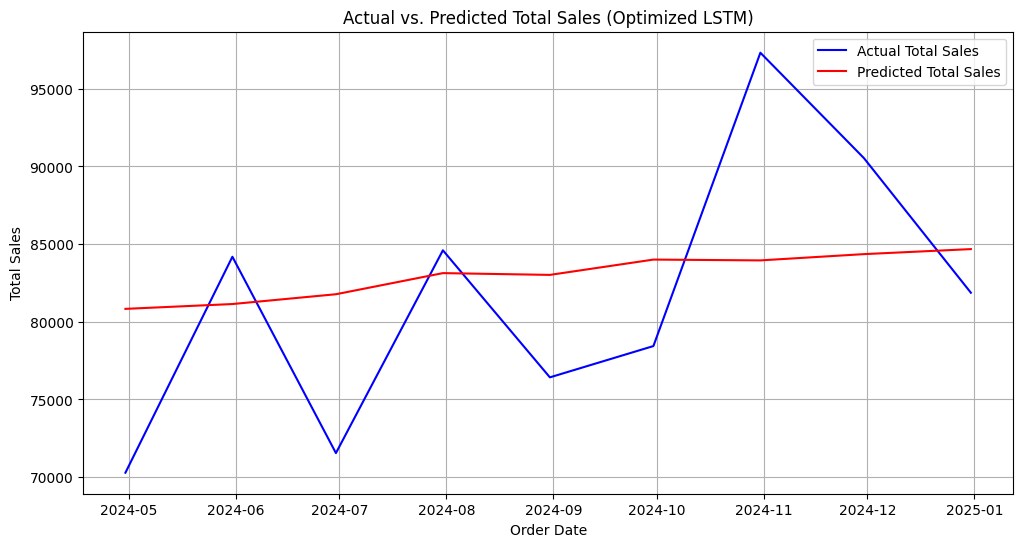

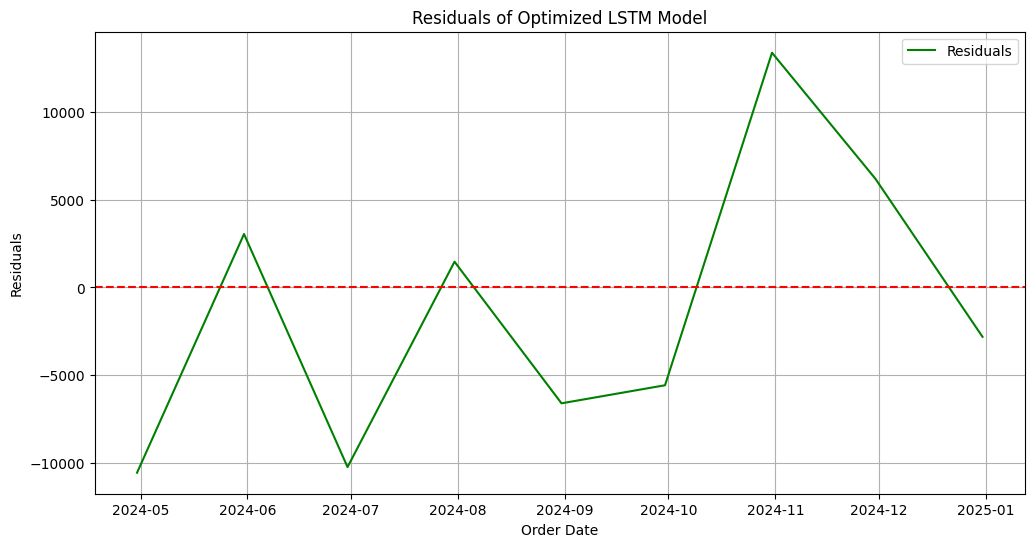

In [42]:
import matplotlib.pyplot as plt

# Assuming optimized_lstm_model and necessary data are available from previous steps

try:
    # 1. Actual vs. Predicted Sales
    lookback = 6  # Use the optimized lookback period
    X_test, y_test = [], []
    df_test_scaled = scaler.transform(np.array(df_test).reshape(-1,1))
    for i in range(lookback, len(df_test_scaled)):
        X_test.append(df_test_scaled[i - lookback:i, 0])
        y_test.append(df_test_scaled[i, 0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    lstm_predictions_scaled = optimized_lstm_model.predict(X_test)
    lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
    y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    plt.figure(figsize=(12, 6))
    plt.plot(df_test.index[lookback:], y_test_unscaled, label='Actual Total Sales', color='blue')
    plt.plot(df_test.index[lookback:], lstm_predictions, label='Predicted Total Sales', color='red')
    plt.xlabel('Order Date')
    plt.ylabel('Total Sales')
    plt.title('Actual vs. Predicted Total Sales (Optimized LSTM)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 2. Calculate and plot residuals
    residuals = y_test_unscaled - lstm_predictions
    plt.figure(figsize=(12, 6))
    plt.plot(df_test.index[lookback:], residuals, label='Residuals', color='green')
    plt.xlabel('Order Date')
    plt.ylabel('Residuals')
    plt.title('Residuals of Optimized LSTM Model')
    plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at zero
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"An error occurred during plotting or residual analysis: {e}")

Find time series plot




## Data loading





Load the Amazon sales dataset



In [1]:
import pandas as pd

try:
    df = pd.read_excel("amazon_sales_dataset_2019_2024_corrected.xlsx")
    display(df.head())
except FileNotFoundError:
    print("Error: 'amazon_sales_dataset_2019_2024_corrected.xlsx' not found.")
    df = None # Assign None to df in case of error
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Order ID,Order Date,Customer ID,Customer Name,Region,Product Category,Product Name,Quantity Sold,Unit Price,Discount (%),Salesperson,Payment Method,Order Status,Total Sales,Profit Margin
0,576ca8db-ad1a-4aa8-9c3a-89102555f200,2019-01-01,48aa940a-5cb5-4103-8d89-19c10fd26aaf,Stephanie Garcia,South America,Home & Kitchen,Speak,9,484.46,21.33,Johnny Marshall,Debit Card,Returned,3430.12,1193.53
1,b7154d7e-f369-4a81-80b1-d36b23cc0420,2019-01-01,8de3545c-78e6-4962-ace5-02e37fe1ce91,Jacob Morales,South America,Books,If,10,179.28,6.43,Bradley Howe,Gift Card,Pending,1677.52,583.70
2,b2852522-fbaa-43fa-b165-bd10e0035591,2019-01-02,6ac41f61-acf6-4e46-8b70-ad00ce01c9d0,John Carroll,North America,Sports,Big,6,185.34,1.57,Johnny Marshall,Amazon Pay,Completed,1094.58,380.86
3,f14eae78-235f-4283-a2cc-6433fd861c14,2019-01-04,04bb6a6a-a62a-4e79-a038-68758f215ccc,Allison Ramirez,Asia,Home & Kitchen,Serious,5,40.98,4.21,Roger Brown,PayPal,Completed,196.27,68.29
4,c3fcb6f0-a399-47eb-8903-2a354425ea75,2019-01-04,2267ce03-37ba-446a-b279-17ecee550c6e,James Thompson,North America,Toys,Operation,10,459.39,20.50,Kristen Ramos,PayPal,Cancelled,3652.15,1270.78


## Data exploration



In [2]:
# Display DataFrame info
print(df.info())

# Display DataFrame shape
print("\nDataFrame Shape:", df.shape)

# Check for missing values in relevant columns
print("\nMissing Values in 'Order Date':", df['Order Date'].isnull().sum())
print("Missing Values in 'Total Sales':", df['Total Sales'].isnull().sum())
print("Missing Values in 'Quantity Sold':", df['Quantity Sold'].isnull().sum())
print("Missing Values in 'Unit Price':", df['Unit Price'].isnull().sum())
print("Missing Values in 'Profit Margin':", df['Profit Margin'].isnull().sum())

# Identify the relevant columns
date_column = 'Order Date'
sales_columns = ['Total Sales', 'Quantity Sold', 'Unit Price', 'Profit Margin']
print(f"\nDate Column: {date_column}")
print(f"Sales Columns: {sales_columns}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          5000 non-null   object        
 1   Order Date        5000 non-null   datetime64[ns]
 2   Customer ID       5000 non-null   object        
 3   Customer Name     5000 non-null   object        
 4   Region            5000 non-null   object        
 5   Product Category  5000 non-null   object        
 6   Product Name      4999 non-null   object        
 7   Quantity Sold     5000 non-null   int64         
 8   Unit Price        5000 non-null   float64       
 9   Discount (%)      5000 non-null   float64       
 10  Salesperson       5000 non-null   object        
 11  Payment Method    5000 non-null   object        
 12  Order Status      5000 non-null   object        
 13  Total Sales       5000 non-null   float64       
 14  Profit Margin     5000 n

## Data preparation




In [3]:
# Group data by month and sum 'Total Sales'
df['Order Date'] = pd.to_datetime(df['Order Date'])
df_monthly = df.groupby(df['Order Date'].dt.to_period('M'))['Total Sales'].sum().reset_index()

# Rename the 'Order Date' column to 'Date'
df_monthly = df_monthly.rename(columns={'Order Date': 'Date'})

# Convert the 'Date' column back to datetime objects
df_monthly['Date'] = df_monthly['Date'].dt.to_timestamp()

# Display the first few rows of the resulting DataFrame
display(df_monthly.head())

,Date,Total Sales
0,2019-01-01,86731.98
1,2019-02-01,70990.77
2,2019-03-01,82256.33
3,2019-04-01,77205.55
4,2019-05-01,90999.19


## Data visualization




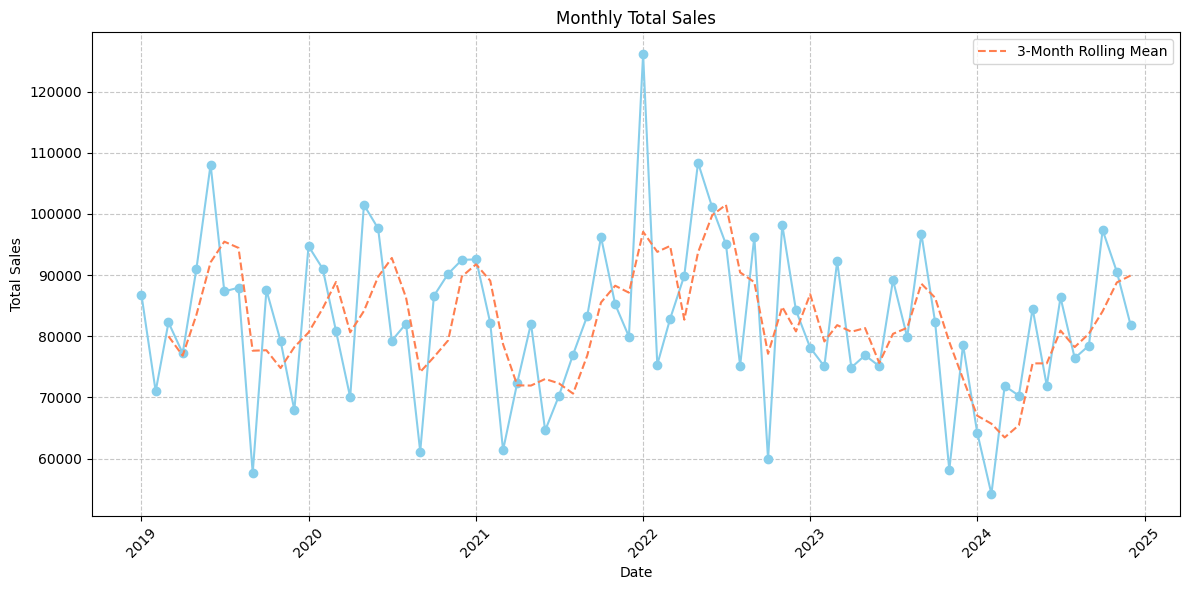

<Figure size 640x480 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt

# Create the time series plot
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
plt.plot(df_monthly['Date'], df_monthly['Total Sales'], marker='o', linestyle='-', color='skyblue')

# Calculate and plot a rolling mean (optional, but recommended)
rolling_mean = df_monthly['Total Sales'].rolling(window=3).mean()  # 3-month rolling mean
plt.plot(df_monthly['Date'], rolling_mean, label='3-Month Rolling Mean', color='coral', linestyle='--')

# Customize the plot
plt.title('Monthly Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent overlapping labels
plt.show()
plt.savefig('monthly_sales_plot.png')